# IQ (Quadrature) demodulation vs Hilbert Transform

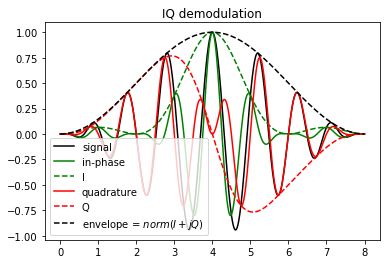

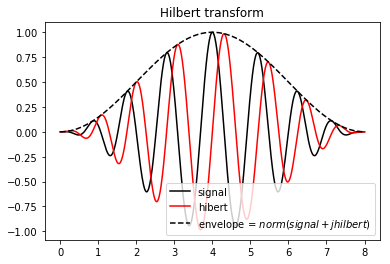

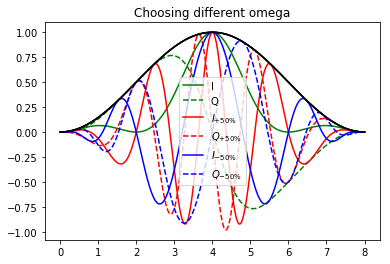

In [1]:
import numpy as np
from scipy import signal as sp
from matplotlib import pyplot as plt

# Constants
N = 1000 # number of samples
omega = 2*np.pi # pulsation
T = 2*np.pi/omega # period
cycles = 8   # cycles of carrier wave

# Compute signals
t = np.linspace(0,T*cycles,N) # time
a = np.hanning(N) # envelope
theta = np.pi/2*np.sin(2*np.pi*t/np.max(t)) # phase
phi = omega*t + theta # instantaneous phase
x = a*np.cos(phi) # signal
inphase = a*np.cos(omega*t)*np.cos(theta) # in-phase component
quadrature = -a*np.sin(omega*t)*np.sin(theta) # quadrature component
I = a*np.cos(theta) # I
Q = a*np.sin(theta) # Q
H = np.imag(sp.hilbert(x)) # Hilbert Transform

# IQ demodulation
plt.figure(1)
plt.title('IQ demodulation')
plt.plot(t,x,'k',label='signal')
plt.plot(t,inphase,'g',label='in-phase')
plt.plot(t,I,'g--',label='I')
plt.plot(t,quadrature,'r',label='quadrature')
plt.plot(t,Q,'r--',label='Q')
plt.plot(t,np.abs(I+1j*Q),'k--',label='envelope = $norm(I+j Q)$')
plt.legend()
plt.show()

# Hilber transform
plt.figure(2)
plt.title('Hilbert transform')
plt.plot(t,x,'k',label='signal')
plt.plot(t,H,'r',label='hibert')
plt.plot(t,np.abs(x + 1j*H),'k--',label='envelope = $norm(signal+j hilbert)$')
plt.legend()
plt.show()

# Choosing different omega
analytic = x + 1j*H
IQ = analytic * np.exp(-1j*omega*t)
IQplus = analytic * np.exp(-1.50j*omega*t)
IQminus = analytic * np.exp(-0.50j*omega*t)

plt.figure(3)
plt.title('Choosing different omega')
plt.plot(t,np.real(IQ),'g',label='I')
plt.plot(t,np.imag(IQ),'g--',label='Q')
plt.plot(t,np.abs(IQ),'k')
plt.plot(t,np.real(IQplus),'r',label='$I_{+50\%}$')
plt.plot(t,np.imag(IQplus),'r--',label='$Q_{+50\%}$')
plt.plot(t,np.abs(IQplus),'k')
plt.plot(t,np.real(IQminus),'b',label='$I_{-50\%}$')
plt.plot(t,np.imag(IQminus),'b--',label='$Q_{-50\%}$')
plt.plot(t,np.abs(IQminus),'k')
plt.legend()
plt.show()